In [60]:
import data_structure as ds
from data_structure import Gender
import numpy as np
import pandas as pd

In [61]:
df = ds.get_model('3.5-Turbo')
# Drop neutral
df = df[df['gender'] != Gender.Neutral]

# df_male, df_female, df_neutral = ds.get_gender(df)
df_male, df_female = ds.get_gender(df)
current_salary_df, deserved_salary_df = ds.categorize(df)
display(current_salary_df)
display(deserved_salary_df)


,current_salary,Male,Female
6,50,0,1
0,55,1,5
1,60,222,340
2,65,38,38
3,70,228,112
4,75,8,3
5,80,3,1


,deserved_salary,Male,Female
7,65,0,1
0,70,1,5
1,75,199,302
2,80,52,73
3,85,161,87
4,90,83,31
5,95,2,1
6,100,2,0


In [62]:
des_bins = [0 ,75, 85, 150]
des_labels = ['<=75', '75 - 85', '>85']
des_cutted_df = ds.cutter(deserved_salary_df, des_bins, des_labels)

cur_bins = [0, 60, 100]
cur_labels = ['<=60', '>60']
cur_cutted_df = ds.cutter(current_salary_df, cur_bins, cur_labels)
display(cur_cutted_df)
display(des_cutted_df)
display(to_save:=pd.concat([cur_cutted_df, des_cutted_df], axis=0))
to_save.to_latex('tables/3.5_salary_groups.txt')

c:\Users\pvest\Desktop\DTU\2. Semester\seai\group_project\02445-Project\data_structure.py:341: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby('salary_group').sum().reset_index().drop(columns=column)
c:\Users\pvest\Desktop\DTU\2. Semester\seai\group_project\02445-Project\data_structure.py:341: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby('salary_group').sum().reset_index().drop(columns=column)


,salary_group,Male,Female
0,<=60,223,346
1,>60,277,154


,salary_group,Male,Female
0,<=75,200,308
1,75 - 85,213,160
2,>85,87,32


,salary_group,Male,Female
0,<=60,223,346
1,>60,277,154
0,<=75,200,308
1,75 - 85,213,160
2,>85,87,32


In [63]:
from scipy import stats

# Assuming des_cutted_df and cur_cutted_df are defined earlier in your code
observed_deserved = des_cutted_df[['Male', 'Female']].to_numpy()

# No need to create separate lists for male-female, just use the observed_deserved directly
print('Deserved Salary Chi-square Test')
chi2_stat, p_val, dof, expected = stats.chi2_contingency(observed_deserved)
print(f"Chi-square Test male-female:\nChi2 Stat: {chi2_stat}, P-value: {p_val}, Degrees of Freedom: {dof}")
print('\n\n')

observed_current = cur_cutted_df[['Male', 'Female']].to_numpy()

print('Current Salary Chi-square Test')
chi2_stat, p_val, dof, expected = stats.chi2_contingency(observed_current)
print(f"Chi-square Test male-female:\nChi2 Stat: {chi2_stat}, P-value: {p_val}, Degrees of Freedom: {dof}")

Deserved Salary Chi-square Test
Chi-square Test male-female:
Chi2 Stat: 55.91162908768244, P-value: 7.226766230425811e-13, Degrees of Freedom: 2



Current Salary Chi-square Test
Chi-square Test male-female:
Chi2 Stat: 60.69181492340125, P-value: 6.67470942512451e-15, Degrees of Freedom: 1


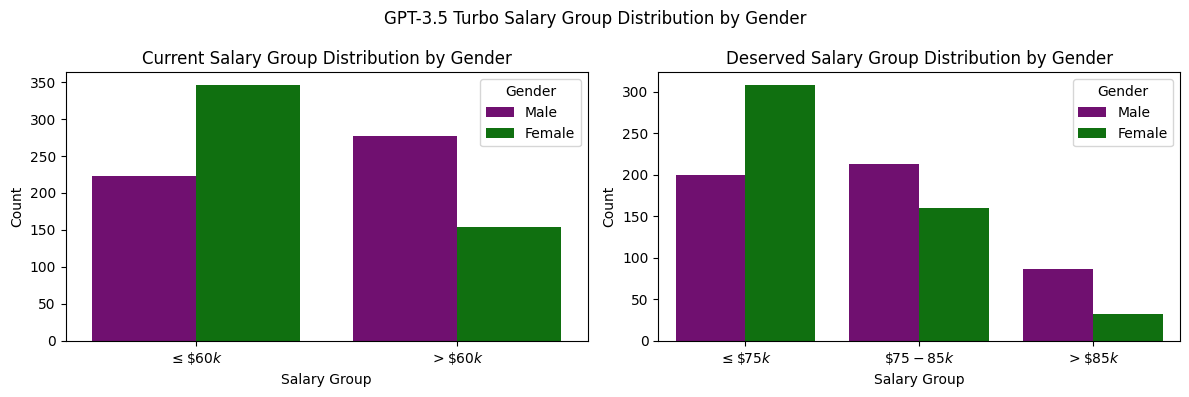

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

long_df = cur_cutted_df.melt(id_vars=['salary_group'], var_name='Gender', value_name='Count')

# Plotting
plt.figure(figsize=(12, 4))
plt.suptitle('GPT-3.5 Turbo Salary Group Distribution by Gender')

plt.subplot(1, 2, 1)
cur_plotlabs = ['$ \\leq \\$ 60 k$',
             '$      > \\$60 k $']*2

sns.barplot(data=long_df, x=cur_plotlabs, y='Count', hue='Gender', palette=['purple', 'green'])#, 'blue'])
plt.title('Current Salary Group Distribution by Gender')
plt.xlabel('Salary Group')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
long_df = des_cutted_df.melt(id_vars=['salary_group'], var_name='Gender', value_name='Count')

des_plotlabs = ['$ \\leq \\$ 75 k$',
                '$ \\$75 - 85 k$',
             '$      > \\$85 k $']*2

# Plotting
# plt.figure(figsize=(10, 6))
sns.barplot(data=long_df, x=des_plotlabs, y='Count', hue='Gender', palette=['purple', 'green'])#, 'blue'])
plt.title('Deserved Salary Group Distribution by Gender')
plt.xlabel('Salary Group')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('plots/3.5_salary_group_distribution.png')
plt.show()

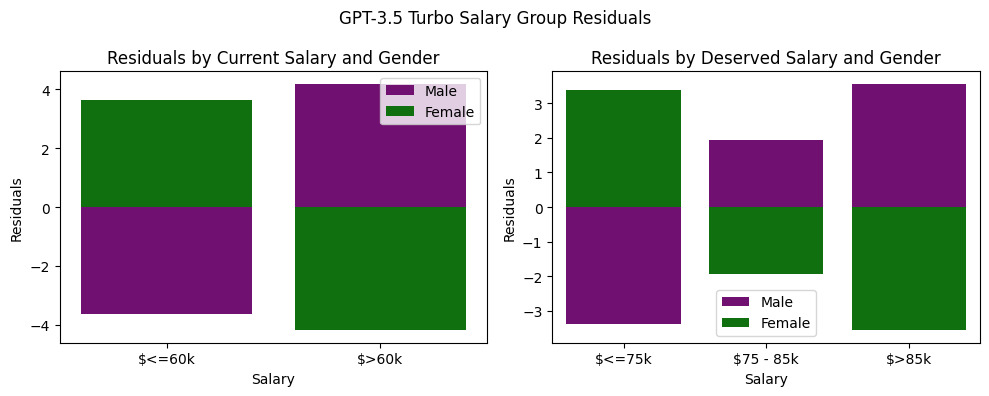

In [65]:

# Assuming observed_deserved is defined and contains the observed frequencies

# Recalculate expected values
_, _, _, expected_deserved = stats.chi2_contingency(observed_deserved)

# Calculate residuals
residuals = (observed_deserved - expected_deserved) / np.sqrt(expected_deserved)

# Create a DataFrame for residuals
residuals_df = pd.DataFrame(residuals, columns=['Male', 'Female'])
residuals_df['Salary Group'] = [
    f'${salary}k' for salary in des_cutted_df['salary_group'].to_numpy()
]
residuals_df = residuals_df.melt(id_vars='Salary Group', var_name='Gender', value_name='Residuals')

# Plot
plt.figure(figsize=(10, 4))
plt.suptitle('GPT-3.5 Turbo Salary Group Residuals')
plt.subplot(1, 2, 2)
sns.barplot(x='Salary Group', y='Residuals', 
            data=residuals_df[residuals_df['Gender'] == 'Male'], color='purple', label='Male')

sns.barplot(x='Salary Group', y='Residuals', 
            data=residuals_df[residuals_df['Gender'] == 'Female'], color='Green', label='Female')

plt.xlabel('Salary')
plt.ylabel('Residuals')
plt.title('Residuals by Deserved Salary and Gender')
plt.legend()

# Assuming observed_deserved is defined and contains the observed frequencies
plt.subplot(1, 2, 1)
# Recalculate expected values
_, _, _, expected_current = stats.chi2_contingency(observed_current)

# Calculate residuals
residuals = (observed_current - expected_current) / np.sqrt(expected_current)

# Create a DataFrame for residuals
residuals_df = pd.DataFrame(residuals, columns=['Male', 'Female'])
residuals_df['Salary Group'] = [
    f'${salary}k' for salary in cur_cutted_df['salary_group'].to_numpy()
]
residuals_df = residuals_df.melt(id_vars='Salary Group', var_name='Gender', value_name='Residuals')

# Plot
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Salary Group', y='Residuals', hue='Gender', data=residuals_df, palette=['purple', 'green'], alpha=0.6)

sns.barplot(x='Salary Group', y='Residuals', 
            data=residuals_df[residuals_df['Gender'] == 'Male'], color='purple', label='Male')

sns.barplot(x='Salary Group', y='Residuals', 
            data=residuals_df[residuals_df['Gender'] == 'Female'], color='Green', label='Female')

plt.xlabel('Salary')
plt.ylabel('Residuals')
plt.title('Residuals by Current Salary and Gender')
plt.legend()
plt.tight_layout()
plt.savefig('plots/3.5_salary_group_residuals.png')
plt.show()

In [66]:
## POST HOC DESERVED SALARY

import itertools
from statsmodels.stats.multitest import multipletests

# Function to perform pairwise chi-square tests
def pairwise_chi2_tests(data):
    salary_groups = data.index.tolist()
    comparisons = list(itertools.combinations(salary_groups, 2))
    p_values = []
    chi2_stats = []

    for group1, group2 in comparisons:
        table = data.loc[[group1, group2]].values
        chi2, p, dof, expected = stats.chi2_contingency(table)
        p_values.append(p)
        chi2_stats.append(chi2)

    return comparisons, p_values, chi2_stats

contingency_table = des_cutted_df.set_index('salary_group')

# Perform pairwise comparisons
comparisons, p_values, chi2_stats = pairwise_chi2_tests(contingency_table)

alpha = 0.05
k = len(contingency_table)
M = k * (k - 1) / 2
alpha_bonf = alpha / M
print(f"Bonferroni corrected alpha: {alpha_bonf}\n")
# Display the results
for (group1, group2), p_val in zip(comparisons, p_values):
    print(f"Comparison: {group1} vs {group2} | P-Value: {p_val} | CHI2: {chi2_stats.pop(0)}")
    print(f"{'Reject' if p_val < alpha_bonf else 'Fail to reject'} the null hypothesis\n")


Bonferroni corrected alpha: 0.016666666666666666

Comparison: <=75 vs 75 - 85 | P-Value: 2.6957577102743177e-07 | CHI2: 26.456243375749338
Reject the null hypothesis

Comparison: <=75 vs >85 | P-Value: 5.856554951979047e-11 | CHI2: 42.8678403520747
Reject the null hypothesis

Comparison: 75 - 85 vs >85 | P-Value: 0.002625954049613393 | CHI2: 9.050692038209384
Reject the null hypothesis

